In [233]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

data = pd.read_csv('netflix_titles.csv') # Import Dataset
data.head() # Display the fist 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [236]:
data.isnull().sum() # Check if there is any null values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [237]:
# Create a temporary dataset so that i can modify it without 
# the risk of currupting the main dataset
df = data

# remove all the rows that contain a missing value(s) for
# more accurate and error free results
df.dropna().head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [192]:
# remove unwanted columns (since we will not be using then in this example)
df.drop(columns=['show_id','title', 'listed_in','cast']).head()

,type,director,country,date_added,release_year,rating,duration,description
0,TV Show,NaN,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,Movie,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...
2,Movie,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow..."
3,Movie,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi..."
4,Movie,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,A brilliant group of students become card-coun...


(United States     2555
 India              923
 United Kingdom     397
 Japan              226
 South Korea        183
 Canada             177
 Spain              134
 France             115
 Egypt              101
 Turkey             100
 Name: country, dtype: int64,
 <AxesSubplot:>)

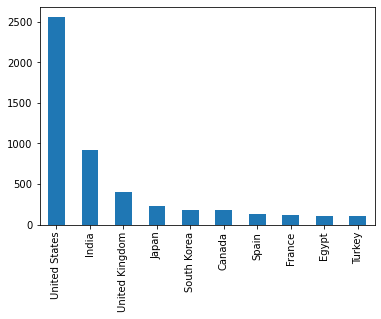

In [238]:
# check which countries has the most releases
Top_Countries = df['country'].value_counts().head(10) 

# visualy display using a bar graph
Top_Countries, Top_Countries.plot(kind='bar') 

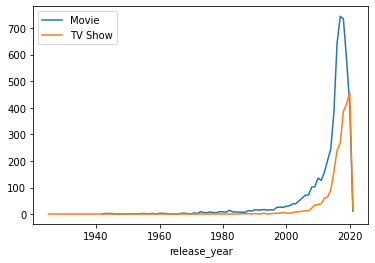

In [194]:
df.groupby(['type']).show_id.count() #group the dataset by type


# making use of .loc to retrieve the data values that we need to compare
movie = df.loc[df['type'] == 'Movie']
tv = df.loc[df['type'] == 'TV Show']

# then we group and plot them
movie.groupby('release_year').show_id.count().plot()
tv.groupby('release_year').show_id.count().plot()
plt.legend(['Movie','TV Show'])

# this graph shows us the grown of 2 types (Movie & TV Shows)
# We can see that Movies bacame very popular before tv shows did

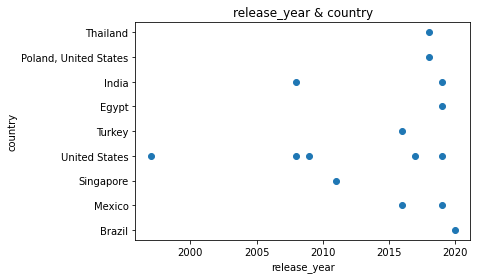

In [232]:
release_year = df['release_year'].sort_values()
#Sort the values to put the years in order

country = df['country']

plt.scatter(df['release_year'].head(15), df.country.head(15))
plt.title('release_year & country')
plt.xlabel('release_year')
plt.ylabel('country')
plt.show()

# here we can see that the countires that released the most 
# amount of movies/TV shows, released
# most of there movies/TV shows after 2008, with the 
# exeption of the outlyer